# Combination: custom-given-raw

Custom CNN
Given split
Raw images (no bounding box)

In [1]:
import torch

import os

import paths

from sysinfo import get_device

from torchvision.datasets import ImageFolder

from transforms import get_transforms

from customcnn import make_model

from train import training_loop

from test_model import test_model



In [2]:
MODEL_ID = 'custom-given-raw'
SAVED_MODEL_PATH = os.path.join(paths.models, MODEL_ID + '.pth')

In [3]:
device = get_device()

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda


In [4]:
dataset = ImageFolder(paths.given_splits_train, transform=get_transforms())
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8)

In [5]:
model = make_model(device)

In [6]:
if os.path.exists(SAVED_MODEL_PATH):
    model.load_state_dict(torch.load(SAVED_MODEL_PATH))
else:
    training_loop(5, model, data_loader, device)
    torch.save(model.state_dict(), SAVED_MODEL_PATH)


Epoch 1 completed. Loss: 3.69502854347229
Epoch 2 completed. Loss: 10.597408294677734
Epoch 3 completed. Loss: 4.218387603759766
Epoch 4 completed. Loss: 3.7699053287506104
Epoch 5 completed. Loss: 3.684396982192993
Training complete.


In [7]:
test_dataset = ImageFolder(paths.given_splits_test, transform=get_transforms())
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=8)


Accuracy of the model on the test images: 3.60%


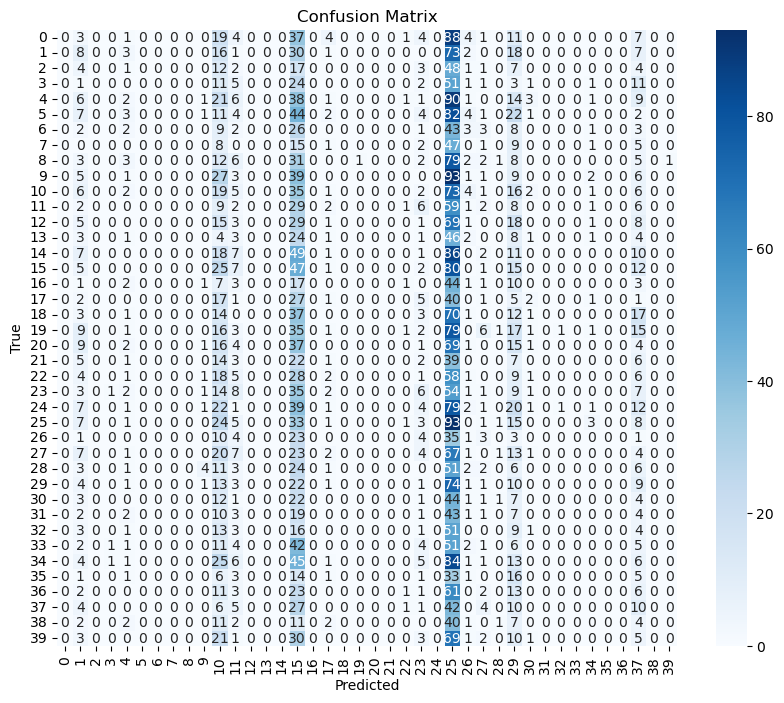

In [8]:
correct, total, accuracy, all_labels, all_predictions = test_model(model, test_data_loader, device)